In [1]:
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model
from itertools import cycle

In [2]:
rnd = np.random
rnd.seed(10)

In [3]:
class Ant:
    ants_num =0
    
    def __init__(self):
        self.visited = [0]
        self.tour_length= 0
        Ant.ants_num +=1
        self.capacity =1000
        self.location = 0
    
    def lost_memory(self):
        self.visited = [0]
        self.tour_length= 0
        Ant.ants_num +=1
        self.capacity =1000
        self.location = 0

In [4]:
#Parameters Declare:
n =50 #number of clients
H = 3 # number of time periods
T = np.arange(1,H+1) # Time horizon index

r_sub = rnd.randint(10,100,size = n+1)
r = r_sub
for i in range(H-1):
    r =np.column_stack((r,r_sub))
    
r[0] = np.zeros((H,),dtype = int)
for i in range(1,n+1):
    r[0] = r[0]+ r[i] #made available units in depot
N_phay = np.arange(1,n+1) #client index
N = np.arange(0,n+1) #node index
U = rnd.choice((2,3),1)[0]*r[:,1] #maximum inventory level
I_0 = U-r[:,1] #Initial inventory level array
I_0[0]=np.sum(U[1:])
h =  rnd.randint(1,5,size =n+1) #holding cost
h[0] = 3
m = 3
Q = 3/(2*m)*np.sum(r[1:,1]) # vehicle capacity

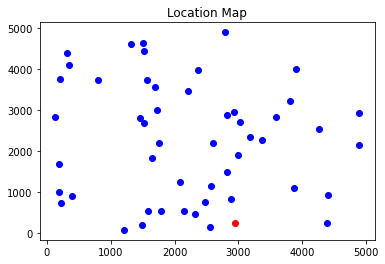

In [5]:
#Create locations
loc_x = rnd.rand(len(N))*5000
loc_y = rnd.rand(len(N))*5000

plt.scatter(loc_x[1:],loc_y[1:], c = 'b')
plt.scatter(loc_x[0],loc_y[0],c ='r')
plt.title('Location Map')
plt.show()

In [6]:
cost_dict = {(i,j): round(np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j])) for i in N for j in N if i!=j} #Moving cost matrix
cost = np.array([[round(np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j])) for i in N]for j in N])
eta = 1/np.array(cost)
tau_0 = 10**-5
tau = np.ones([n+1,n+1])*tau_0
pheromone = eta
alpha =0.5 #evaporation rate
q_0 = .9
beta = 1.3
choice_info = np.multiply(tau,eta**beta)
best_tour = []
best_tour_length = np.inf
tour_length_list = []

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
def construct_sol(ant):
    temp_choice_info = choice_info.copy()
    
    while len(ant.visited) <= n:
        cur_loc = ant.location
        choice_available = temp_choice_info[cur_loc]
        temp_choice_info[:,cur_loc] =0
        q =np.random.rand()
        if q < q_0:
            ant.location = np.argmax(choice_available)
        else :
            prob = choice_available/np.sum(choice_available)
            ant.location =rnd.choice(N,p =prob)
            
        ant.visited.append(ant.location)
        ant.tour_length += cost[cur_loc,ant.location]
        
    ant.tour_length += cost[ant.location,0]
    ant.visited.append(0)

In [8]:
def local_update(ant):
    global tau
    global choice_info
    for i in range(len(ant.visited)-1):
        a = ant.visited[i]
        b= ant.visited[i+1]
        tau[a,b] += (1-alpha)*tau[a,b] +alpha*tau_0
        tau[b,a] =tau[a,b]
        choice_info = np.multiply(tau,eta**beta)
        
def global_update():
    global tau
    global choice_info
    tau =(1-alpha)*tau +0.01*alpha/best_tour_length
    choice_info = np.multiply(tau,eta**beta)

In [9]:
this_cute_ant= Ant()
for t in range(5000):
    this_cute_ant.lost_memory()
    construct_sol(this_cute_ant)
    tour_length_list.append(this_cute_ant.tour_length)
    if best_tour_length > this_cute_ant.tour_length:
        best_tour_length = this_cute_ant.tour_length
        best_tour = this_cute_ant.visited
        print("current_best", best_tour_length)
    local_update(this_cute_ant)
    if t%10==0:
        global_update()
        print("t= ",t)

current_best 33776
t=  0
t=  10
t=  20
t=  30
t=  40
t=  50
t=  60
t=  70
t=  80
t=  90
t=  100
t=  110
t=  120
t=  130
t=  140
t=  150
t=  160
t=  170
t=  180
t=  190
t=  200
t=  210
t=  220
t=  230
t=  240
t=  250
t=  260
t=  270
t=  280
t=  290
t=  300
t=  310
t=  320
t=  330
t=  340
t=  350
t=  360
t=  370
t=  380
t=  390
t=  400
t=  410
t=  420
t=  430
t=  440
t=  450
t=  460
t=  470
t=  480
t=  490
t=  500
t=  510
t=  520
t=  530
t=  540
t=  550
t=  560
t=  570
t=  580
t=  590
t=  600
t=  610
t=  620
t=  630
t=  640
t=  650
t=  660
t=  670
t=  680
t=  690
t=  700
t=  710
t=  720
t=  730
t=  740
t=  750
t=  760
t=  770
t=  780
t=  790
t=  800
t=  810
t=  820
t=  830
t=  840
t=  850
t=  860
t=  870
t=  880
t=  890
t=  900
t=  910
t=  920
t=  930
t=  940
t=  950
t=  960
t=  970
t=  980
t=  990
t=  1000
t=  1010
t=  1020
t=  1030
t=  1040
t=  1050
t=  1060
t=  1070
t=  1080
t=  1090
t=  1100
t=  1110
t=  1120
t=  1130
t=  1140
t=  1150
t=  1160
t=  1170
t=  1180
t=  1190
t=  1200
t= 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


ValueError: probabilities contain NaN

In [ ]:
choice_info[0]

In [ ]:
plt.plot(tour_length_list)

In [14]:
a = [1,2]
b=a.copy()

[1, 2]